In [17]:
#import libraries and data
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_excel("SupplyChain_TimeSeriesData.xlsx")
df = df.dropna()
df.head()

,Order,Material,Batch,Group,MaterialCategory,Total order quantity,Unit,Quantity of goods received,Schedule Start Date,Schedule Finish Date,Confirmation Start Date,First Goods Movement Date,Goods Receipt Date,Usage Decision Date
0,100565,100000340,B23120,134,1,952.0,L,954.0,2016-10-30,2016-11-07,2016-11-01,2016-11-01,2016-11-01,2016-11-09
1,100464,100000551,B23055,143,12,40.0,PC,39.0,2016-11-01,2016-11-08,2016-11-02,2016-11-01,2016-11-07,2016-11-08
12,100335,100000932,B23208,144,12,256.0,µMO,220.0,2016-10-31,2016-11-15,2016-11-14,2016-11-01,2016-11-30,2017-03-02
23,101193,100001540,B23088,157,13,600.0,PC,600.0,2016-11-10,2016-11-23,2016-11-03,2016-11-02,2016-11-08,2016-11-10
25,100497,100001560,B23138,143,12,6000.0,ML,0.0,2016-11-10,2016-11-18,2016-11-17,2016-11-10,2016-10-30,2016-11-22


In [28]:
#Create colummns for actual duration and scheduled duration
df['scheduled_duration_nowkend'] = df.apply(lambda row: pd.bdate_range( row['Schedule Start Date'], row['Schedule Finish Date']).shape[0] \
                                            if not pd.isna(row['Schedule Start Date']) and not pd.isna(row['Schedule Finish Date']) else np.nan, axis=1 )
df['actual_duration_nowkend'] = df.apply(lambda row: pd.bdate_range( row['Confirmation Start Date'], row['Usage Decision Date']).shape[0] \
                                         if not pd.isna(row['Confirmation Start Date']) and not pd.isna(row['Usage Decision Date']) else np.nan, axis=1 )

#Change the units to ML
df.loc[df["Unit"] == "µL", "Total order quantity"] = df["Total order quantity"]/1000
df.loc[df["Unit"] == "L", "Total order quantity"] = df["Total order quantity"] * 1000
df["Unit"] = "ML"

#Put df in chronological order
df = df.sort_values("Confirmation Start Date", ascending = 1)
df.head()

,Order,Material,Batch,Group,MaterialCategory,Total order quantity,Unit,Quantity of goods received,Schedule Start Date,Schedule Finish Date,Confirmation Start Date,First Goods Movement Date,Goods Receipt Date,Usage Decision Date,scheduled_duration_nowkend,actual_duration_nowkend
267,100970,100000414,B22820,120,9,5815.0,ML,0.0,2016-11-02,2016-11-07,2016-09-26,2016-11-07,2016-10-30,2016-11-30,4,48
551,100942,100002235,B22893,106,4,16.0,ML,16.0,2016-10-31,2016-11-04,2016-10-07,2016-11-09,2016-11-11,2016-11-11,5,26
91,101417,100001930,B110,138,15,6000.0,ML,1100.0,2016-10-31,2016-11-09,2016-10-08,2016-11-07,2017-01-18,2017-07-27,8,209
29,101418,100001930,B112,138,15,20.0,ML,20.0,2017-03-22,2017-03-28,2016-10-10,2017-03-27,2017-06-28,2017-07-28,5,210
30,101419,100001930,B123,138,15,6000.0,ML,653.0,2016-10-31,2016-11-09,2016-10-19,2016-11-01,2016-11-01,2017-10-04,8,251


In [29]:
#Split into 15 categories

df_mat1 = df.loc[df["MaterialCategory"] == 1 & (df["Unit"] == "ML")]
df_mat2 = df.loc[df["MaterialCategory"] == 2 & (df["Unit"] == "ML")]
df_mat3 = df.loc[df["MaterialCategory"] == 3 & (df["Unit"] == "ML")]
df_mat4 = df.loc[df["MaterialCategory"] == 4 & (df["Unit"] == "ML")]
df_mat5 = df.loc[df["MaterialCategory"] == 5 & (df["Unit"] == "ML")]
df_mat6 = df.loc[df["MaterialCategory"] == 6 & (df["Unit"] == "ML")]
df_mat7 = df.loc[df["MaterialCategory"] == 7 & (df["Unit"] == "ML")]
df_mat8 = df.loc[df["MaterialCategory"] == 8 & (df["Unit"] == "ML")]
df_mat9 = df.loc[df["MaterialCategory"] == 9 & (df["Unit"] == "ML")]
df_mat10 = df.loc[df["MaterialCategory"] == 10 & (df["Unit"] == "ML")]
df_mat11 = df.loc[df["MaterialCategory"] == 11 & (df["Unit"] == "ML")]
df_mat12 = df.loc[df["MaterialCategory"] == 12 & (df["Unit"] == "ML")]
df_mat13 = df.loc[df["MaterialCategory"] == 13 & (df["Unit"] == "ML")]
df_mat14 = df.loc[df["MaterialCategory"] == 14 & (df["Unit"] == "ML")]
df_mat15 = df.loc[df["MaterialCategory"] == 15 & (df["Unit"] == "ML")]

df_mat1.head()


,Order,Material,Batch,Group,MaterialCategory,Total order quantity,Unit,Quantity of goods received,Schedule Start Date,Schedule Finish Date,Confirmation Start Date,First Goods Movement Date,Goods Receipt Date,Usage Decision Date,scheduled_duration_nowkend,actual_duration_nowkend
644,100685,100001340,B23459,134,1,100000.0,ML,99.7,2016-10-31,2016-11-07,2016-10-31,2016-11-01,2016-11-10,2016-11-10,6,9
696,100612,100000556,B23602,134,1,460000.0,ML,459.0,2016-10-31,2016-11-03,2016-10-31,2016-11-01,2016-11-01,2016-11-17,4,14
1045,101449,100002351,B23949,138,1,50.0,ML,50.0,2016-10-31,2016-11-04,2016-10-31,2016-11-01,2016-11-04,2016-12-01,5,24
732,100574,100000341,B23333,130,1,10000000.0,ML,10000.0,2016-10-30,2016-11-07,2016-11-01,2016-11-01,2016-11-01,2016-11-04,6,4
680,100021,100000592,B23638,129,1,16000.0,ML,16.0,2016-11-17,2016-11-30,2016-11-01,2016-11-01,2016-11-04,2016-11-15,10,11


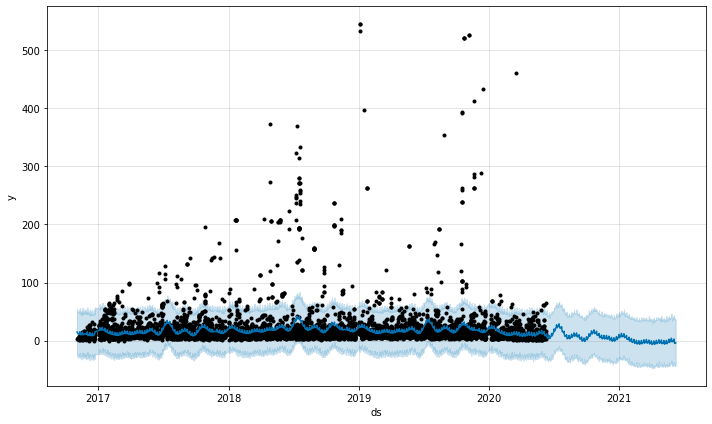

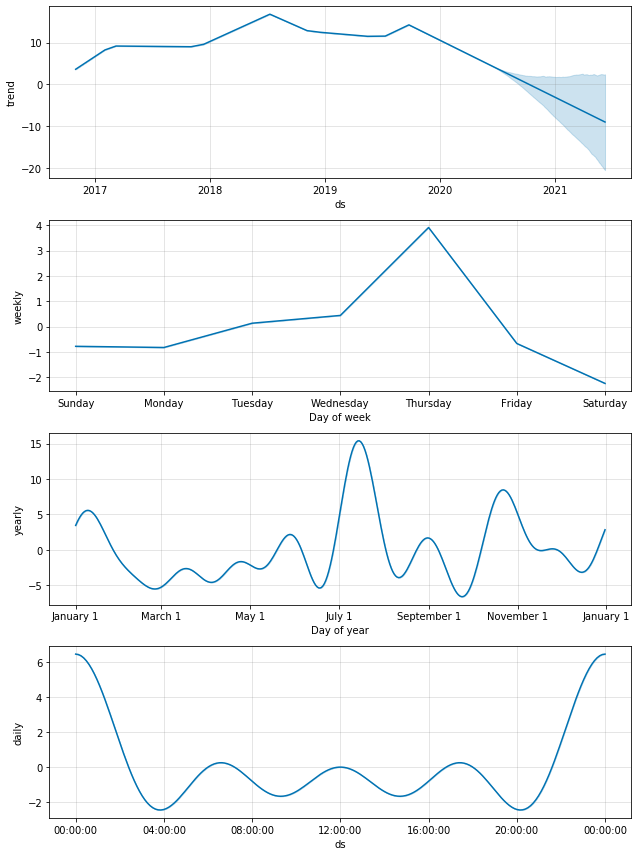

In [32]:
#Time series forecast Material 1

df_mat1_analysis = df_mat1[['Usage Decision Date', 'actual_duration_nowkend']].copy()
df_mat1_analysis.columns = ['ds', 'y']


m = Prophet(daily_seasonality=True)
m.fit(df_mat1_analysis)

future_1 = m.make_future_dataframe(periods = 365)

forecast_1 = m.predict(future_1)  

mat1_fig1 = m.plot(forecast_1) 
mat1_fig2 = m.plot_components(forecast_1)

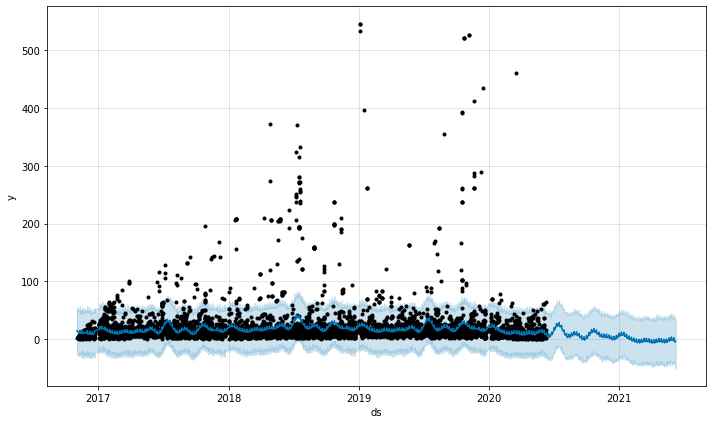

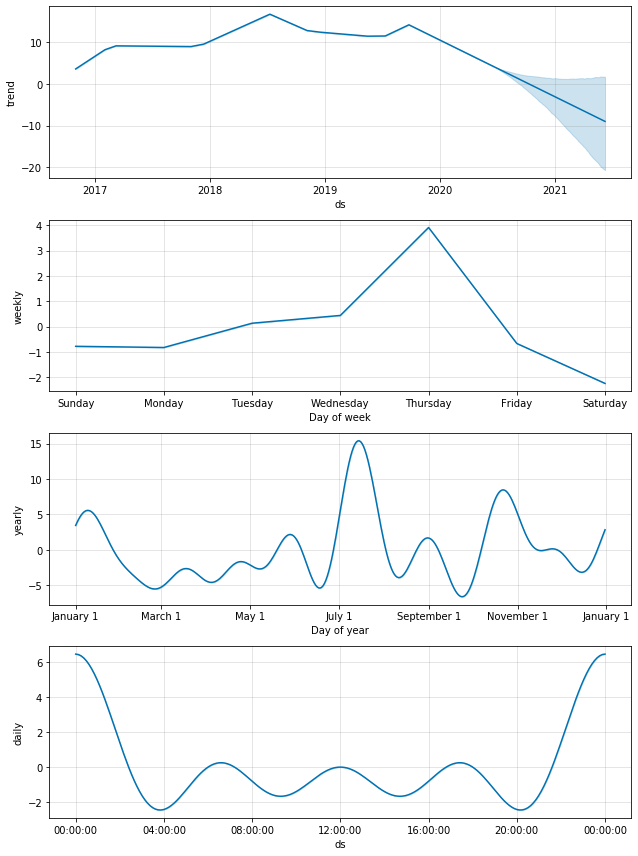

In [37]:
#Time series forecast Material 3

df_mat3_analysis = df_mat3[['Usage Decision Date', 'actual_duration_nowkend']].copy()
df_mat3_analysis.columns = ['ds', 'y']


m = Prophet(daily_seasonality=True)
m.fit(df_mat3_analysis)

future_3 = m.make_future_dataframe(periods = 365)

forecast_3 = m.predict(future_3)  

mat3_fig1 = m.plot(forecast_3) 
mat3_fig2 = m.plot_components(forecast_3)